<a href="https://colab.research.google.com/github/Ebratul/practices/blob/main/heart_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [134]:
df = pd.read_csv("https://raw.githubusercontent.com/Ebratul/practices/refs/heads/main/heart.csv?token=GHSAT0AAAAAADI5JLRQCNJI56RXCELO5I5I2EXPGRQ")


In [135]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [137]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [138]:
df.duplicated().sum()

np.int64(0)

In [139]:
df['Sex'].value_counts()

,count
Sex,
M,725
F,193


#data Proprocessing

In [140]:
df.ffill()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
le = LabelEncoder()

In [143]:
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])

In [144]:
df.head(6)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0


#visual

In [145]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [146]:
import matplotlib.pyplot as plt
import seaborn as sb


#PiYG, PRGn, BrBG, PuOr, RdGy, RdBu, RdYlBu, RdYlGn, Spectral


<Axes: >

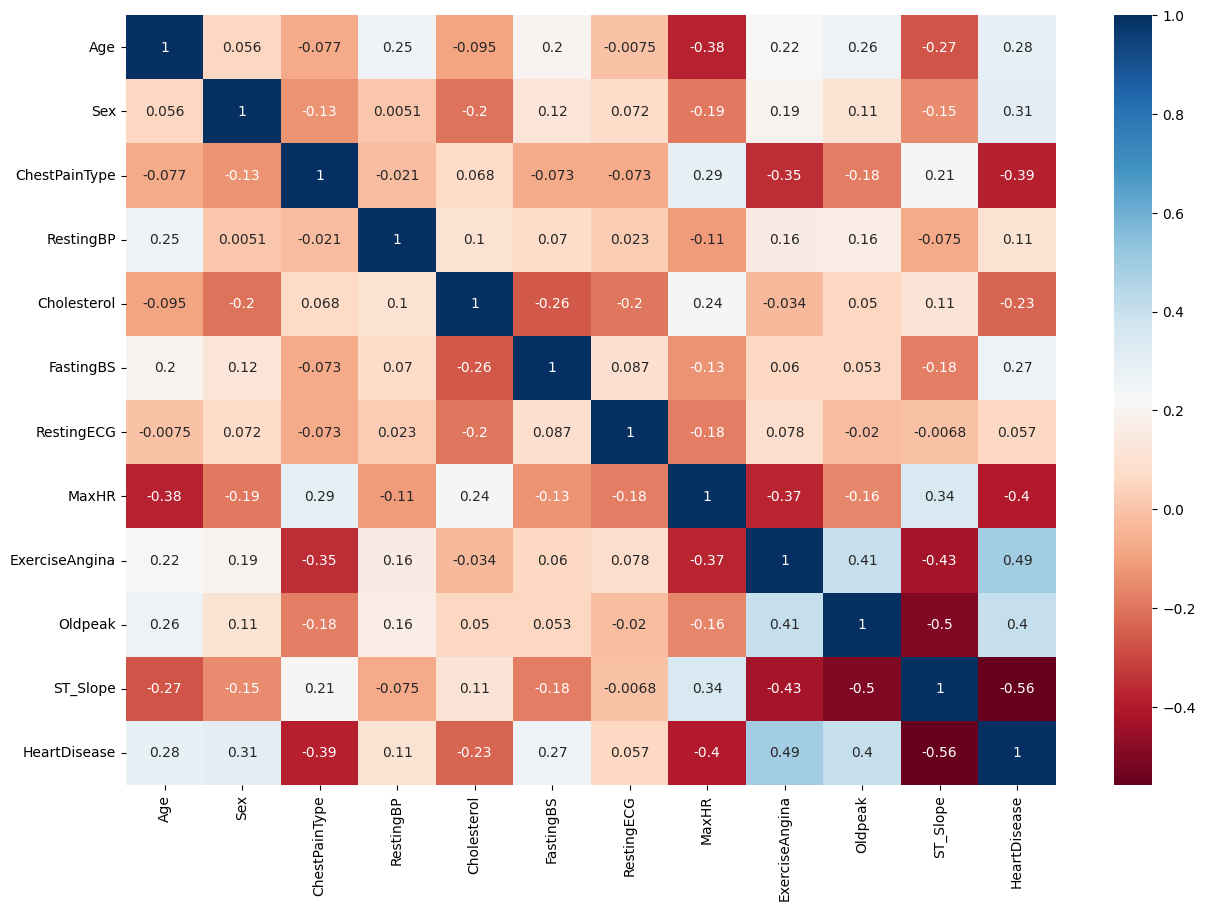

In [147]:
plt.figure(figsize=(15, 10))
corr_table =  df.corr()
sb.heatmap(corr_table, annot =True,cmap ='RdBu')

<Axes: xlabel='HeartDisease'>

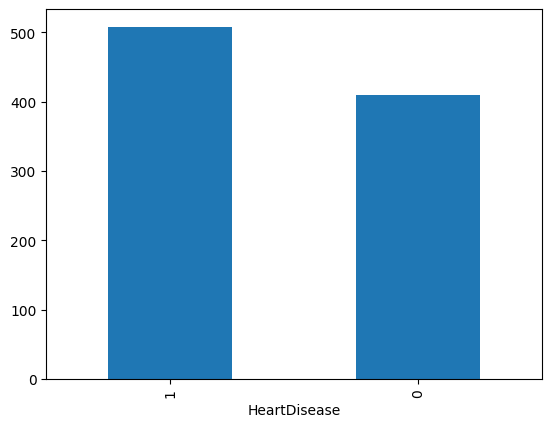

In [148]:
df['HeartDisease'].value_counts().plot(kind='bar')

In [149]:
# sb.scatterplot(x, y,data = df)

#train test split

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
x = df.iloc[:,:-1]
y = df['HeartDisease']

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 42)

# model train
**SVM**

In [153]:
from sklearn.svm import SVC

In [154]:
svm = SVC(random_state=42, kernel='linear',gamma= 'auto')

In [155]:
svm.fit(x_train, y_train)

SVC(gamma='auto', kernel='linear', random_state=42)

In [156]:
svm.score(x_test, y_test), svm.score(x_train, y_train)

(0.8369565217391305, 0.8637602179836512)

In [157]:
y_pred_svm = svm.predict(x_test)
y_pred_svm

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1])

# random forest

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rc = RandomForestClassifier(random_state=42,max_features='log2', criterion = 'gini', n_estimators= 150)
rc.fit(x_train, y_train)
rc.score(x_test, y_test), rc.score(x_train, y_train)

(0.8804347826086957, 1.0)

In [160]:
pred_rc = rc.predict(x_test)
pred_rc

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1])

#prediction

In [161]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

#Logistic

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [164]:
lr.score(x_test, y_test), lr.score(x_train, y_train)

(0.842391304347826, 0.8583106267029973)

In [165]:
pred_lr = lr.predict(x_test)
pred_lr

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1])

In [166]:
f_col = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


In [167]:
df.head(6)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0


In [168]:
len(df.columns)


12

In [185]:
ex1 = {
    'Age': 45,
    'Sex': 0,
    'ChestPainType': 2,
    'RestingBP': 170,
    'Cholesterol': 190,
    'FastingBS': 0,
    'RestingECG': 1,
    'MaxHR': 130,
    'ExerciseAngina': 1,
    'Oldpeak': 0,
    'ST_Slope': 2
}
df_ex1 = pd.DataFrame([ex1], columns = f_col)
pred_svm = svm.predict(df_ex1)
pred_rc = rc.predict(df_ex1)
pred_lr = lr.predict(df_ex1)


In [186]:
print(pred_lr)
print(pred_rc)
print(pred_svm)

[0]
[0]
[0]


# evaluation

In [187]:
from sklearn.metrics import accuracy_score

In [191]:
pred_svm = svm.predict(x_test)   # X_test হলো test features, পুরো টেস্ট ডেটাসেট
accuracy_svm = accuracy_score(y_test, pred_svm)
pred_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, pred_lr)
pred_rc = rc.predict(x_test)
accuracy_rc = accuracy_score(y_test, pred_rc)

In [193]:
print(accuracy_svm)
print(accuracy_lr)
print(accuracy_rc)

0.8369565217391305
0.842391304347826
0.8804347826086957
